### 클래스 불균형
- 하나의 값에 치우진 데이터로 학습한 모델이 치우진 클래스에 대해 편향되는 문제
- 정확도가 높으나 재현율이 매우 낮은 경향이 있음


#### 클래스 불균형 탐색
1. 불균형 비율 탐색
2. knn 활용 : knn은 클래스 불균형 에 매우 민감하므로 진단에 적절(k = 5~11)

문제 해결
- 소수 클래스에 대한 결정 공간 넓히기

- 오버 샘플링 : 데이터가 작을 때 유용
- 언더 샘플링 : 데이터가 클 때 유용
- 결정 경계에 가까운 샘플을 제거하거나 생성해야 함.
- 평가 데이터에 대해서는 샘플링x

<br>

- 오버 샘플링 : ex) Smote
    - k_neighbors를 1,3,5 정도로 설정
    - sampling_strategy : 사전 형태로 입력하여 샘플 개수 조정
- 언더 샘플링 : ex)NearMiss
    - n_neighbors, sampling_strategy
    - version : 2로 주로 설정
    

#### 오버 샘플링

In [2]:
import os
import pandas as pd
os.chdir(r"C:\Users\Gyu\Desktop\mywork\FastOnline\5. 머신러닝 모델의 성능 향상을 위한 전처리\데이터")
df = pd.read_csv("Secom.csv")

In [3]:
from sklearn.model_selection import train_test_split

X = df.drop('Y', axis = 1)
Y = df['Y']
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y)

Train_Y.value_counts()

-1    1090
 1      85
Name: Y, dtype: int64

In [4]:
# 클래스 불균형 비율 계산
Train_Y.value_counts().iloc[0] / Train_Y.value_counts().iloc[-1]

12.823529411764707

In [5]:
# kNN을 사용한 클래스 불균형 테스트
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import *
kNN_model = KNN(n_neighbors = 11).fit(Train_X, Train_Y)
pred_Y = kNN_model.predict(Test_X)
print(recall_score(Test_Y, pred_Y))
print(accuracy_score(Test_Y, pred_Y))

# 재현율이 0%로 불균형이 심각한 수준이라 보임

0.0
0.951530612244898


In [8]:
from imblearn.over_sampling import SMOTE
# SMOTE 인스턴스 생성
oversampling_instance = SMOTE(k_neighbors = 3)

# 오버샘플링 적용
o_Train_X, o_Train_Y = oversampling_instance.fit_sample(Train_X, Train_Y)

# ndarray 형태가 되므로 다시 DataFrame과 Series로 변환 (남은 전처리가 없다면 하지 않아도 무방)
o_Train_X = pd.DataFrame(o_Train_X, columns = X.columns)
o_Train_Y = pd.Series(o_Train_Y)

C:\Users\Gyu\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [9]:
# 같은 모델로 다시 평가: 정확도는 감소했으나, 재현율이 크게 오름을 확인
kNN_model = KNN(n_neighbors = 11).fit(o_Train_X, o_Train_Y)
pred_Y = kNN_model.predict(Test_X)
print(recall_score(Test_Y, pred_Y))
print(accuracy_score(Test_Y, pred_Y))

0.42105263157894735
0.5969387755102041


#### 언더 샘플링

In [10]:
df = pd.read_csv("page-blocks0.csv")
X = df.drop('Class', axis = 1)
Y = df['Class']

Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y)

Train_Y.replace({"negative":-1, "positive":1}, inplace = True)
Test_Y.replace({"negative":-1, "positive":1}, inplace = True)

# 클래스 불균형 비율 계산
Train_Y.value_counts().iloc[0] / Train_Y.value_counts().iloc[-1]

9.034229828850856

In [12]:
from imblearn.under_sampling import NearMiss
NM_model = NearMiss(version = 2) # version = 2: 모든 소수 클래스 샘플까지의 평균 거리를 활용

# NearMiss 적용
u_Train_X, u_Train_Y = NM_model.fit_sample(Train_X, Train_Y)
u_Train_X = pd.DataFrame(u_Train_X, columns = X.columns)
u_Train_Y = pd.Series(u_Train_Y)

C:\Users\Gyu\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Gyu\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Gyu\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [13]:
# kNN 재적용을 통한 성능 변화 확인
from sklearn.neighbors import KNeighborsClassifier as KNN
from sklearn.metrics import *
kNN_model = KNN(n_neighbors = 11).fit(u_Train_X, u_Train_Y)
pred_Y = kNN_model.predict(Test_X)
print(recall_score(Test_Y, pred_Y))
print(accuracy_score(Test_Y, pred_Y))

# 재현율은 크게 올랐으나, 정확도가 크게 떨어짐 => 적당한 비율에 맞게 설정해야 함

0.9333333333333333
0.21564327485380116


In [14]:
NM_model = NearMiss(version = 2, sampling_strategy = {1:u_Train_Y.value_counts().iloc[-1],
                                                      -1:u_Train_Y.value_counts().iloc[-1] * 5}) # 5:1 정도의 비율로 언더샘플링 재수행

u_Train_X, u_Train_Y = NM_model.fit_sample(Train_X, Train_Y)
u_Train_X = pd.DataFrame(u_Train_X, columns = X.columns)
u_Train_Y = pd.Series(u_Train_Y)

u_Train_Y.value_counts()

C:\Users\Gyu\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Gyu\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Gyu\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)
C:\Users\Gyu\AppData\Roaming\Python\Python36\site-packages\sklearn\utils\deprecation.py:86: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.2

-1    2045
 1     409
dtype: int64

In [15]:
kNN_model = KNN(n_neighbors = 11).fit(u_Train_X, u_Train_Y)
pred_Y = kNN_model.predict(Test_X)
print(recall_score(Test_Y, pred_Y))
print(accuracy_score(Test_Y, pred_Y))

0.8
0.658625730994152


### 비용 민감 모델
- 위음성 비용 : 긍정을 부정으로 오분류
- 위양성 비용 : 부정을 긍정으로 오분류
- 위음성 비용 = w * 위양성 비용

#### cut-off
cut-off를 조정하는 식으로 비용 민감 모델을 구현할 수 있음.
    - knn, 신경망, 의사결정 나무, 앙상블에서도 적용은 가능
    

#### class_weight
트리모델, svc 등에서 클래스에 가중치 부여

In [17]:
df = pd.read_csv("Secom.csv")
X = df.drop('Y', axis = 1)
Y = df['Y']
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y)

In [18]:
# 비용 민감 모델 적용전 Logistic Regression 모델 테스트
from sklearn.linear_model import LogisticRegression as LR
model = LR(max_iter = 100000).fit(Train_X, Train_Y)
pred_Y = model.predict(Test_X)
print(recall_score(Test_Y, pred_Y))
print(accuracy_score(Test_Y, pred_Y))

0.17857142857142858
0.9081632653061225


C:\Users\Gyu\AppData\Roaming\Python\Python36\site-packages\sklearn\linear_model\_logistic.py:764: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of f AND g EVALUATIONS EXCEEDS LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


In [20]:
# cut off value를 조정하는 함수 작성
def cost_sensitive_model(model, cut_off_value, Test_X, Test_Y):
    probs = model.predict_proba(Test_X)
    probs = pd.DataFrame(probs, columns = model.classes_)
    pred_Y = 2 * (probs.iloc[:, -1] >= cut_off_value) - 1
    recall = recall_score(Test_Y, pred_Y)
    accuracy = accuracy_score(Test_Y, pred_Y)
    return recall, accuracy

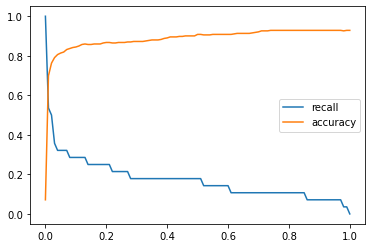

In [21]:
# cut off value에 따른 recall과 accuracy 변화 확인
from matplotlib import pyplot as plt
import numpy as np

cut_off_value_list = np.linspace(0, 1, 101)
recall_list = []
accuracy_list = []

for c in cut_off_value_list:
    recall, accuracy = cost_sensitive_model(model, c, Test_X, Test_Y)
    recall_list.append(recall)
    accuracy_list.append(accuracy)

%matplotlib inline    
plt.plot(cut_off_value_list, recall_list, label = 'recall')   
plt.plot(cut_off_value_list, accuracy_list, label = 'accuracy')    
plt.legend()

class weight

In [22]:
df = pd.read_csv("page-blocks0.csv")
X = df.drop('Class', axis = 1)
Y = df['Class']
Train_X, Test_X, Train_Y, Test_Y = train_test_split(X, Y)
Train_Y.replace({"negative":-1, "positive":1}, inplace = True)
Test_Y.replace({"negative":-1, "positive":1}, inplace = True)

In [23]:
from sklearn.svm import SVC
model = SVC().fit(Train_X, Train_Y)
pred_Y = model.predict(Test_X)
print(recall_score(Test_Y, pred_Y))
print(accuracy_score(Test_Y, pred_Y))

0.072992700729927
0.9071637426900585


In [24]:
# class weight 조정
model = SVC(class_weight = {1:8, -1:1}).fit(Train_X, Train_Y)
pred_Y = model.predict(Test_X)
print(recall_score(Test_Y, pred_Y))
print(accuracy_score(Test_Y, pred_Y))

0.9343065693430657
0.631578947368421
